### Высокопроизводительные вычисления: Домашнее задание №1: ДЗ-1

1. (50%) На основании данных рейтинга top500 спрогнозировать  производительность компьютера №1 в 2025

2. (50%) Оцените какой процент всего производимого на Земле электричества потребляют все компьютеры из top500 (на основании открытых данных top500.org)

3. (10% Бонус) Улучшить производительность программы с реализацией алгоритма матричного умножения (сниппет https://bit.ly/339RAhp )

#### Задание 1. На основании данных рейтинга top500 спрогнозировать производительность компьютера №1 в 2025.

Данные: https://top500.org/statistics/perfdevel/

In [1]:
import requests
from lxml import html
from pprint import pprint
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

HEADERS = {'User-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) '
                             'Chrome/83.0.4103.61 Safari/537.36'}

In [2]:
data_link = 'https://top500.org/statistics/perfdevel/'
response = requests.get(data_link, headers=HEADERS)
dom = html.fromstring(response.text)
script_blocks = dom.xpath("//script")
data_table = script_blocks[12]

In [3]:
pprint(data_table.text[500:1500])

("#500');\n"
 "        dataTable.addColumn({type: 'string', role: 'tooltip'});\n"
 '\n'
 '        dataTable.addRows([\n'
 '            \n'
 '                      [   new Date(1993, 5, 1),\n'
 '                          1128.57,\n'
 '                          "06/1993: Sum = 1.1 TFlop/s",\n'
 '                          59.70,\n'
 '                          "06/1993: #1 = 59.7 GFlop/s",\n'
 '                          0.42,\n'
 '                          "06/1993: #500 = 0.4 GFlop/s"],\n'
 '             \n'
 '                      [   new Date(1993, 10, 1),\n'
 '                          1493.35,\n'
 '                          "11/1993: Sum = 1.5 TFlop/s",\n'
 '                          124.00,\n'
 '                          "11/1993: #1 = 124.0 GFlop/s",\n'
 '                          0.47,\n'
 '                          "11/1993: #500 = 0.5 GFlop/s"],\n'
 '             \n'
 '                      [   new Date(1994, 5, 1),\n'
 '                          2317.01,\n'
 '                   

Нас интересуют данные, начинающиеся с "new Date". В данных везде стоят 5 и 10 месяцы, на графике на сайте указаны июнь и ноябрь, поэтому сделаем замену.

In [4]:
dates_data = re.findall('new Date\((.+?)\),\n', data_table.text)
dates_data = [date.replace(', ', '-').replace('-5-1', '-06-01').replace('-10-1', '-11-01') for date in dates_data]
dates_data[:10]

['1993-06-01',
 '1993-11-01',
 '1994-06-01',
 '1994-11-01',
 '1995-06-01',
 '1995-11-01',
 '1996-06-01',
 '1996-11-01',
 '1997-06-01',
 '1997-11-01']

Gflop - минимальная единица, приводим все к ней <br>
Gflop/s - e0<br>
Tflop/s - e3<br>
Pflop/s - e6<br>
Eflop/s - e9

In [5]:
sum_data = re.findall('Sum\s=\s(.+?)\",\n', data_table.text)
sum_data = [float(sdata.replace(' GFlop/s', 'e0').replace(' TFlop/s', 'e3').replace(' PFlop/s', 'e6').replace(' EFlop/s', 'e9')) for sdata in sum_data]
sum_data[:10]

[1100.0,
 1500.0,
 2300.0,
 2700.0,
 3900.0,
 4800.0,
 5900.0,
 8000.0,
 12800.0,
 16900.0]

In [6]:
top1_data = re.findall('#1\s=\s(.+?)\",\n', data_table.text)
top1_data = [float(top1.replace(' GFlop/s', 'e0').replace(' TFlop/s', 'e3').replace(' PFlop/s', 'e6').replace(' EFlop/s', 'e9')) for top1 in top1_data]
top1_data[:10]

[59.7, 124.0, 143.4, 170.0, 170.0, 170.0, 220.4, 368.2, 1100.0, 1300.0]

In [7]:
top500_data = re.findall('#500\s=\s(.+?)\"],', data_table.text)
top500_data = [float(top500.replace(' GFlop/s', 'e0').replace(' TFlop/s', 'e3').replace(' PFlop/s', 'e6').replace(' EFlop/s', 'e9')) for top500 in top500_data]
top500_data[:10]

[0.4, 0.5, 0.8, 1.2, 2.0, 2.5, 3.3, 4.6, 7.7, 9.5]

In [8]:
df = pd.DataFrame()
df['date'] = dates_data
df['date'] = df['date'].apply(pd.to_datetime)
df['sum'] = sum_data
df['top1'] = top1_data
df['top500'] = top500_data
df.head()

,date,sum,top1,top500
0,1993-06-01,1100.0,59.7,0.4
1,1993-11-01,1500.0,124.0,0.5
2,1994-06-01,2300.0,143.4,0.8
3,1994-11-01,2700.0,170.0,1.2
4,1995-06-01,3900.0,170.0,2.0


In [9]:
df.tail()

,date,sum,top1,top500
54,2020-06-01,2.200000e+09,4.155000e+08,1200000.0
55,2020-11-01,2.400000e+09,4.420000e+08,1300000.0
56,2021-06-01,2.800000e+09,4.420000e+08,1500000.0
57,2021-11-01,3.000000e+09,4.420000e+08,1600000.0
58,2022-06-01,4.400000e+09,1.100000e+09,1600000.0


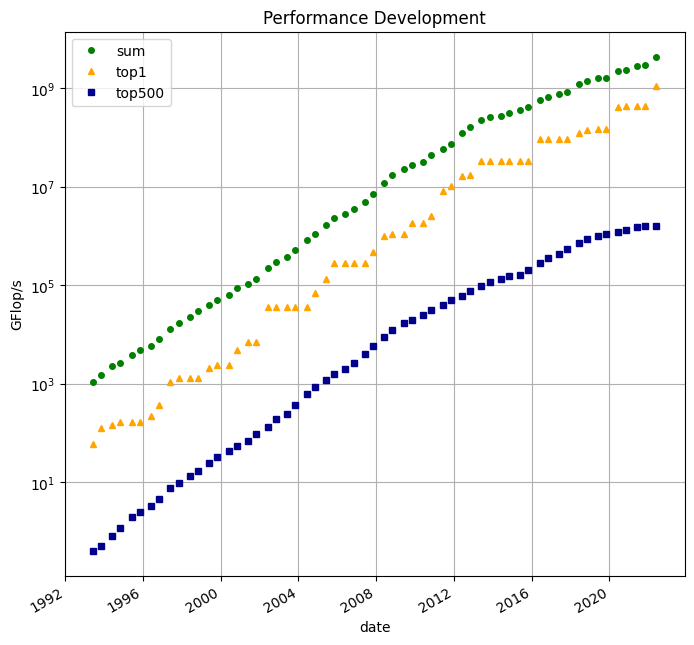

In [10]:
plt.figure(figsize=(8, 8))
plt.title('Performance Development')
plt.box(True)
ax = plt.subplot()
colors = ['green', 'orange', 'DarkBlue']
df.plot('date', ['sum', 'top1', 'top500'], ax=ax, logy=True, style=['o','^','s'], color=colors, ms=4, grid=True)
ax.set_ylabel('GFlop/s')
plt.show()

Для прогноза воспользуемся линейной моделью.

In [11]:
df['X'] = (df['date'] - df['date'][0]).dt.days.values
df.head()

,date,sum,top1,top500,X
0,1993-06-01,1100.0,59.7,0.4,0
1,1993-11-01,1500.0,124.0,0.5,153
2,1994-06-01,2300.0,143.4,0.8,365
3,1994-11-01,2700.0,170.0,1.2,518
4,1995-06-01,3900.0,170.0,2.0,730


In [12]:
model = LR()
model.fit(df['X'].values.reshape(-1, 1), np.log(df['top1'].values.reshape(-1, 1)))
preds = np.exp(model.predict(df['X'].values.reshape(-1, 1)))
df['preds'] = preds

df.tail()

,date,sum,top1,top500,X,preds
54,2020-06-01,2.200000e+09,4.155000e+08,1200000.0,9862,6.093123e+08
55,2020-11-01,2.400000e+09,4.420000e+08,1300000.0,10015,7.784605e+08
56,2021-06-01,2.800000e+09,4.420000e+08,1500000.0,10227,1.093105e+09
57,2021-11-01,3.000000e+09,4.420000e+08,1600000.0,10380,1.396556e+09
58,2022-06-01,4.400000e+09,1.100000e+09,1600000.0,10592,1.961028e+09


In [13]:
target_date = pd.to_datetime('2025-06-01')
target_X = np.array((target_date - df['date'][0]).days)
result = np.exp(model.predict(target_X.reshape(-1, 1)))[0][0]
print(f'Прогнозируемая производительность компьютера №1 в 2025: {result} GFlop/s')

Прогнозируемая производительность компьютера №1 в 2025: 11340834540.284977 GFlop/s


In [14]:
df = df.append({'date': target_date, 'sum': 0, 'top1': result, 'top500': 0, 'X': 0, 'preds': result}, ignore_index=True)

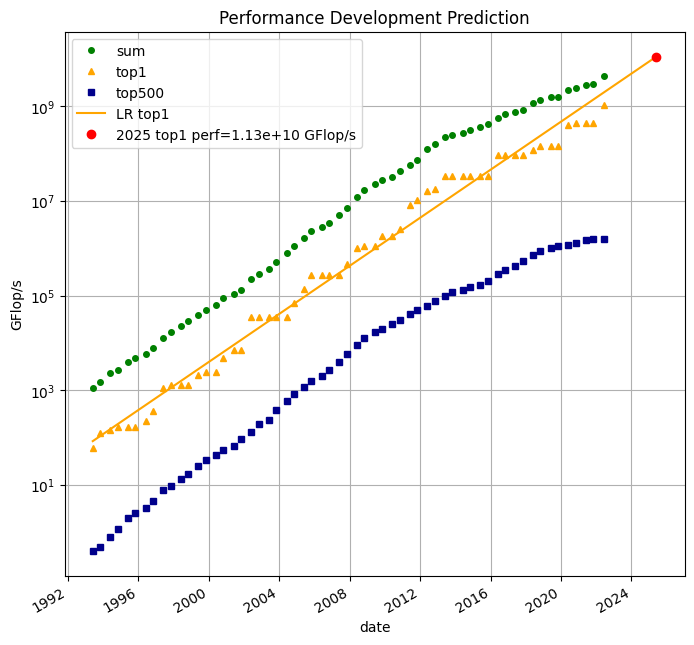

In [15]:
plt.figure(figsize=(8, 8))
plt.title('Performance Development Prediction')
plt.box(True)
ax = plt.subplot()
colors = ['green', 'orange', 'DarkBlue']
df.plot('date', ['sum', 'top1', 'top500'], ax=ax, logy=True, style=['o','^','s'], color=colors, ms=4, grid=True)
df.plot('date', ['preds'], ax=ax, logy=True, style=['-'], color='orange', ms=1, grid=True, label=['LR top1'])
plt.plot(target_date, result,'ro', label=f'2025 top1 perf={result:.3} GFlop/s') 
plt.legend()
ax.set_ylabel('GFlop/s')
plt.show()

#### Ответ: Прогнозируемая производительность компьютера №1 в 2025 составит примерно 11.3 EFlop/s. Это больше, чем суммарная производительность сейчас (4.4 EFlop/s).

#### Задание 2. Оцените какой процент всего производимого на Земле электричества потребляют все компьютеры из top500 (на основании открытых данных top500.org)

По данным из https://en.m.wikipedia.org/wiki/List_of_countries_by_electricity_production, всего в мире в 2020 году было произведено 26823200 GWh.

In [16]:
world_electricity_production = 26823200e9

Данные отсюда: https://www.top500.org/lists/top500/2022/06/download/TOP500_202206.xlsx

In [17]:
top500_df = pd.read_excel('TOP500_202206.xlsx')
top500_df.head()

,Rank,Previous Rank,First Appearance,First Rank,Name,Computer,Site,Manufacturer,Country,Year,...,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent,Site ID,System ID
0,1,NaN,59,1,Frontier,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",DOE/SC/Oak Ridge National Laboratory,HPE,United States,2021,...,AMD Instinct MI250X,64,AMD Milan,HPE Cray EX235a,HPE Cray EX,Gigabit Ethernet,Slingshot-11,North America,48553,180047
1,2,1.0,55,1,Supercomputer Fugaku,"Supercomputer Fugaku, A64FX 48C 2.2GHz, Tofu i...",RIKEN Center for Computational Science,Fujitsu,Japan,2020,...,None,48,Fujitsu A64FX,Supercomputer Fugaku,Fujitsu Cluster,Proprietary Network,Tofu interconnect D,Asia,50831,179807
2,3,NaN,59,3,LUMI,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",EuroHPC/CSC,HPE,Finland,2022,...,AMD Instinct MI250X,64,AMD Milan,HPE Cray EX235a,HPE Cray EX,Gigabit Ethernet,Slingshot-11,Europe,50908,180048
3,4,2.0,51,1,Summit,"IBM Power System AC922, IBM POWER9 22C 3.07GHz...",DOE/SC/Oak Ridge National Laboratory,IBM,United States,2018,...,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,48553,179397
4,5,3.0,51,3,Sierra,"IBM Power System AC922, IBM POWER9 22C 3.1GHz,...",DOE/NNSA/LLNL,IBM / NVIDIA / Mellanox,United States,2018,...,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,49763,179398


In [18]:
top500_df.columns

Index(['Rank', 'Previous Rank', 'First Appearance', 'First Rank', 'Name',
       'Computer', 'Site', 'Manufacturer', 'Country', 'Year', 'Segment',
       'Total Cores', 'Accelerator/Co-Processor Cores', 'Rmax [TFlop/s]',
       'Rpeak [TFlop/s]', 'Nmax', 'Nhalf', 'HPCG [TFlop/s]', 'Power (kW)',
       'Power Source', 'Energy Efficiency [GFlops/Watts]', 'Memory',
       'Architecture', 'Processor', 'Processor Technology',
       'Processor Speed (MHz)', 'Operating System', 'OS Family',
       'Accelerator/Co-Processor', 'Cores per Socket', 'Processor Generation',
       'System Model', 'System Family', 'Interconnect Family', 'Interconnect',
       'Continent', 'Site ID', 'System ID'],
      dtype='object')

Нас интересует признак 'Power (kW)' - это электропотребление системы в КВ (видимо в час). Мы рассматриваем мировое потребление за год, поэтому будем умножать на 365 дней и на 24 часа. Еще умножим на 1000, чтобы привести к одному порядку.

In [19]:
top500_df['Power (kW)'].describe()

count      191.000000
mean      1782.651571
std       3496.747991
min         53.290000
25%        511.770000
50%        835.000000
75%       1466.890000
max      29899.230000
Name: Power (kW), dtype: float64

Много пропущенных значений. Заполним их средним значением.

In [20]:
top500_df['Power (kW)'] = top500_df['Power (kW)'].fillna(top500_df['Power (kW)'].mean())
top500_df['Power (kW)'].describe()

count      500.000000
mean      1782.651571
std       2157.699007
min         53.290000
25%       1294.720000
50%       1782.651571
75%       1782.651571
max      29899.230000
Name: Power (kW), dtype: float64

In [21]:
top500_electricity_consumption = (top500_df['Power (kW)'].sum()) * 24 * 365 * 1000
print(f'Все компьютеры из top500 потребляют за год {top500_electricity_consumption} W')

Все компьютеры из top500 потребляют за год 7808013879581.152 W


In [22]:
print(f'Всего в 2020 году в мире было произведено {world_electricity_production} W')

Всего в 2020 году в мире было произведено 2.68232e+16 W


In [23]:
result = 100 * top500_electricity_consumption / world_electricity_production
print(f'Процент всего производимого на Земле электричества, который потребляют все компьютеры из top500 = {result:.2}%')

Процент всего производимого на Земле электричества, который потребляют все компьютеры из top500 = 0.029%


#### Ответ: компьютеры из top500 в 2022 потребляют около 0.03% всего производимого в мире электричества(по данным 2020 года).